## Setup

In [1]:
# Install dependencies if needed
%pip install openai
%pip install scikit-learn

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update,

In [11]:
from IPython.display import Image, display
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from PIL import Image
import base64

import matplotlib.pyplot as plt

In [4]:
from openai import OpenAI

client = OpenAI(api_key='sk-xxx')

In [5]:
image_path = "sample1_snapshot.png"

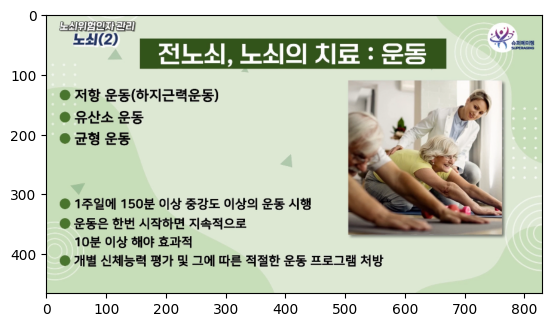

In [8]:
im = Image.open(image_path)
plt.imshow(im)
plt.show()

referece : https://cookbook.openai.com/examples/custom_image_embedding_search

In [18]:
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read())
        return encoded_image.decode('utf-8')
    
def image_query(query, image_path):
    response = client.chat.completions.create(
        model='gpt-4-vision-preview',
        messages=[
            {
            "role": "user",
            "content": [
                {
                "type": "text",
                "text": query,
                },
                {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encode_image(image_path)}",
                },
                }
            ],
            }
        ],
        # max_tokens=300,
    )
    
    return response.choices[0].message.content


'질문 1: 노년기의 운동에서 하지근력운동의 목적은 무엇인가요?\n답변: 안전한 동작을 위해 하지 근육을 강화하는 것입니다.\n\n질문 2: 1주일에 최소 몇 번 이상 근육운동을 실시하는 것이 권장됩니까?\n답변: 1주일에 150분 이상 중강도 이상의 운동을 사용하여 10분 이상 시작할 것을 권장합니다.\n\n질문 3: 노인이 규칙적인 운동 프로그램을 시작할 때 주의해야 할 사항은 무엇인가요?\n답변: 개별 신체능력에 맞게 및 그에 따른 적절한 운동 프로그램을 찾아야 합니다.'

In [22]:

query = '''
교육 동영상을 캡쳐한 화면이야. 교육 받은 시청자가 교육 내용을 잘 이해했는지 확인하기 위한 단답형 퀴즈 3개를 만들어줘. 
질문과 답변만. 
결과물을 그대로 출력할 수 있도록 기타 내용을 제외하고.
'''    

generated_quizes = image_query(query, image_path) 
print(generated_quizes)

질문 1: 노년층의 운동 지도 시 유의해야 할 첫 번째 사항은 무엇인가요?
답변: 지정 운동(하지근력운동)

질문 2: 장노년 이상의 노년층이 운동을 할 때 적정한 운동 시간은 얼마인가요?
답변: 1주일에 150분 이상

질문 3: 운동을 할 때 중점을 두어야 할 부분은 무엇인가요?
답변: 안전


In [26]:

query = '''
교육 동영상을 캡쳐한 화면이야. 교육 받은 시청자가 교육 내용을 잘 이해했는지 확인하기 위한 객관식 퀴즈 3개를 만들어줘. 
질문과 답변만.
결과물을 그대로 출력할 수 있도록 기타 내용을 제외하고.
'''    

generated_quizes = image_query(query, image_path) 
print(generated_quizes)   

1. 노년기의 운동에서 가장 중요하게 고려되어야 할 것은 무엇인가요?
    - A) 자형 운동
    - B) 유산소 운동
    - C) 근력 운동
    - 정답: A) 자형 운동

2. 1주일에 몇 회 이상의 운동을 해야 심혈관 질환의 위험이 감소하나요?
    - A) 1회
    - B) 5회
    - C) 10회
    - 정답: B) 5회

3. 노년기 운동 프로그램에 참여하기 전 반드시 필요한 것은 무엇인가요?
    - A) 전문가와 상담
    - B) 고강도 인터벌 트레이닝
    - C) 매일 아침 일찍 일어나기
    - 정답: A) 전문가와 상담
